# Critical distance $L$

Here, we find the critical $L$ that makes the load equal to 1. To compute the critical $L$, we need to solve the window problem. This is done analytically when $p=1$ or $w\rightarrow\infty$ -- otherwise, it is estimated via a simulation.

In [1]:
import numpy as np
import math
import importlib as imp
import QCSsimulator as sim
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdmn

## Fixed parameter values

In [2]:
# Requests
n_request = 7 # Number of entanglements requested per request
request_rate = 1e-4 # [1/us] Request submission rate per pair of users

$n$ only affects the service time distribution. When computing $u_\mathrm{crit}$, we need the expected service time. Increasing $n$ would increase the expected service time but would not change the behavior of the system otherwise. Nevertheless, a large $n$ would increase the runtime of the simulation (and the analytics, since we need to compute more combinations of successful patterns). Hence, we choose a nontrivial value of $n$ that is not too large.

$\lambda_0$ has a similar effect, since it multiplies $\mathbb{E}\left[T_\mathrm{service}\right]$ in the calculation of $u_\mathrm{crit}$. If $\lambda_0$ is very small/large, the critical number of users will shift towards larger/smaller values. We choose a value of $\lambda_0$ that provides interesting behavior for reasonable numbers of users (other values of $\lambda_0$ would only shift the region of interest towards larger or smaller values of the other parameters).

In [3]:
# Topology
u_vec = np.arange(2,20+1,1) # Number of users in the star

# Hardware
N_vec = [0,1,2,5] # Number of repeaters between each user and the hub
fwd_time_0 = 100 # [us] Forwarding time

We focus on ranges of values of $u$ and $N$ that provide interesting behavior.

The forwarding time of each forwarding station is assumed to be 100 $\mu$s. This estimate is for qubits realized with color centers (such as nitrogen vacancies). A gate on those qubits takes around 1-50 $\mu$s, and approximately ten gates (order of magnitude) are needed to forward a quantum data packet.

In [4]:
# Reference units
speed_light = 0.2 # [km/us] Speed of light in optical fiber

We assume the physical channels between users are optical fibers in which the speed of light is approximately $0.2$ km/$\mu$s.

In [5]:
# Other
control_time = 0

We assume negligible control time, since this does not affect the load of the system, which is used to compute the critical number of users.

In [10]:
# Numerical (for solver)
tolerance = 1e-3

# Plots
dark = False
savefig = True

---

The critical distance can be upper bounded as $$ L_\mathrm{crit} \leq \frac{c k}{\lambda_0 u(u-1)m} - \frac{c t_{\mathrm{fwd}}}{2} \left( 2N +\left\lceil \frac{n}{m} \right\rceil \right) $$


Observation: when $w\rightarrow\infty$, the critical length is larger for sequential distribution???

---

---
---
# INFINITE window - sequential

In [34]:
distribution = 'sequential'

N_vec = [0,2,5,10,20]

# Requests
w_request = np.inf # [us] Time between delivery of first and last entangled pair


# Hardware
k = 12 # Number of forwarding devices


# Numerical
N_samples = None
randomseed = None

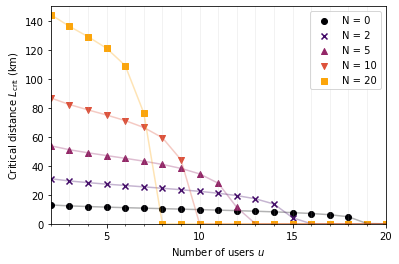

In [35]:
imp.reload(sim)

crit_L_vec = [np.zeros(len(u_vec)) for _ in N_vec]

for idx_N, N in enumerate(N_vec):
    for idx_u in range(len(u_vec)):
        
        u = u_vec[idx_u]
                
        critical_L = sim.find_critical_L(distribution, N, n_request, w_request, u, k, request_rate,
                                         speed_light, fwd_time_0, control_time,
                                         N_samples, randomseed, tolerance=tolerance)
        crit_L_vec[idx_N][idx_u] = critical_L
        
sim.plot_critL_vs_u(crit_L_vec, distribution, N_vec, u_vec, n_request, w_request, k,
                request_rate, speed_light, fwd_time_0, control_time, N_samples, randomseed, savefig=savefig)

---
---
# INFINITE window - parallel

In [44]:
distribution = 'parallel'

N_vec = [0,2,5,10,20]

# Requests
w_request = np.inf # [us] Time between delivery of first and last entangled pair


# Hardware
k = 18 # Number of forwarding devices


# Numerical
N_samples = int(1e2)
randomseed = 2

N = 0 repeaters:   0%|          | 0/19 [00:00<?, ?it/s]

N = 2 repeaters:   0%|          | 0/19 [00:00<?, ?it/s]

N = 5 repeaters:   0%|          | 0/19 [00:00<?, ?it/s]

N = 10 repeaters:   0%|          | 0/19 [00:00<?, ?it/s]

N = 20 repeaters:   0%|          | 0/19 [00:00<?, ?it/s]

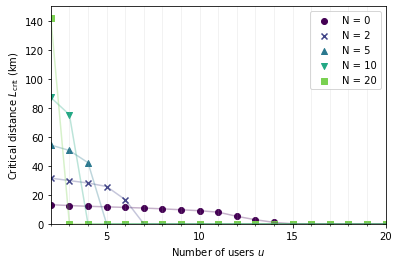

In [45]:
imp.reload(sim)

crit_L_vec = [np.zeros(len(u_vec)) for _ in N_vec]

for idx_N, N in enumerate(N_vec):
    for idx_u in tqdmn(range(len(u_vec)), 'N = %d repeaters'%N, leave='False'):
        
        u = u_vec[idx_u]
                
        critical_L = sim.find_critical_L(distribution, N, n_request, w_request, u, k, request_rate,
                                         speed_light, fwd_time_0, control_time,
                                         N_samples, randomseed, tolerance=tolerance)
        crit_L_vec[idx_N][idx_u] = critical_L
        
sim.plot_critL_vs_u(crit_L_vec, distribution, N_vec, u_vec, n_request, w_request, k,
                request_rate, speed_light, fwd_time_0, control_time, N_samples, randomseed, savefig=savefig)

---
---
# FINITE window - sequential

In [26]:
distribution = 'sequential'

N_vec = [0,2,5,10,20]

# Requests
w_request = 8 # [us] Time between delivery of first and last entangled pair


# Hardware
k = 12 # Number of forwarding devices


# Numerical
N_samples = int(1e4)
randomseed = 2

N = 0 repeaters:   0%|          | 0/19 [00:00<?, ?it/s]

N = 2 repeaters:   0%|          | 0/19 [00:00<?, ?it/s]

N = 5 repeaters:   0%|          | 0/19 [00:00<?, ?it/s]

N = 10 repeaters:   0%|          | 0/19 [00:00<?, ?it/s]

N = 20 repeaters:   0%|          | 0/19 [00:00<?, ?it/s]

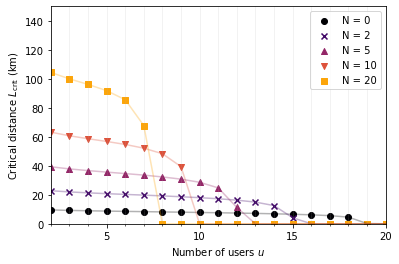

In [27]:
imp.reload(sim)

crit_L_vec = [np.zeros(len(u_vec)) for _ in N_vec]

for idx_N, N in enumerate(N_vec):
    for idx_u in tqdmn(range(len(u_vec)), 'N = %d repeaters'%N, leave='False'):
        
        u = u_vec[idx_u]
                
        critical_L = sim.find_critical_L(distribution, N, n_request, w_request, u, k, request_rate,
                                         speed_light, fwd_time_0, control_time,
                                         N_samples, randomseed, tolerance=tolerance)
        crit_L_vec[idx_N][idx_u] = critical_L
        
sim.plot_critL_vs_u(crit_L_vec, distribution, N_vec, u_vec, n_request, w_request, k,
                request_rate, speed_light, fwd_time_0, control_time, N_samples, randomseed, savefig=savefig)

---

### CONCLUSIONS:

 -
---